In [1]:
import pandas as pd
df = pd.read_csv('animal_df.csv')

In [2]:
df.head(10)

animal_type  has_name outcome_group  age_days_outcome age_group_intake  \
0         Dog         0      Positive               733      Young Adult   
1         Dog         1       Neutral               916      Young Adult   
2         Cat         1      Positive               176     Puppy/Kitten   
3       Other         0      Negative               732      Young Adult   
4         Cat         1      Positive               367      Young Adult   
5         Dog         1      Positive               746      Young Adult   
6         Dog         1      Positive               746      Young Adult   
7         Dog         1      Positive              1462            Adult   
8         Dog         1      Positive               137     Puppy/Kitten   
9         Dog         0       Neutral              1465            Adult   

   los_at_shelter month_of_outcome  is_fixed breed_type color_group  \
0               1         February         0       Pure       Brown   
1               1         February         0        Mix       Black   
2               2         February         1       Pure         Red   
3               1         February         0       Pure       Brown   
4               1         February         1       Pure       Brown   
5               1         February         1       Pure       Brown   
6               1         February         1       Pure       White   
7               1         February         1        Mix       Black   
8               1         February         1        Mix        Gold   
9               3         February         0        Mix       Brown   

  intake_condition_group  
0                Injured  
1         Healthy/Normal  
2         Healthy/Normal  
3         Healthy/Normal  
4         Healthy/Normal  
5         Healthy/Normal  
6         Healthy/Normal  
7         Healthy/Normal  
8         Healthy/Normal  
9         Healthy/Normal

In [ ]:
df.dtypes


animal_type               object
has_name                   int64
outcome_group             object
age_days_outcome           int64
age_group_intake          object
los_at_shelter             int64
month_of_outcome          object
is_fixed                   int64
breed_type                object
color_group               object
intake_condition_group    object
dtype: object

# Clustering

In [3]:
# Drop target variable
df_clustering = df.drop(columns=['outcome_group'])

In [ ]:
sample_size = 30000
df_clustering_sample = df.sample(n=sample_size, random_state=42)

## K-Prototypes

No standardization of numerics or categories needed

In [ ]:
# !pip install kmodes
# !pip install ace-tools

‚úÖ Step 1: Identifying Numerical & Categorical Features...
‚úÖ Step 2: Finding Optimal Number of Clusters using Elbow Method...
   ‚ñ∂Ô∏è Running K-Prototypes for K=2...
   ‚úÖ Done in 136.74 sec - Cost: 8426702338.166809
   ‚ñ∂Ô∏è Running K-Prototypes for K=3...
   ‚úÖ Done in 230.35 sec - Cost: 4421115746.547457
   ‚ñ∂Ô∏è Running K-Prototypes for K=4...
   ‚úÖ Done in 303.99 sec - Cost: 2400680708.319936
   ‚ñ∂Ô∏è Running K-Prototypes for K=5...
   ‚úÖ Done in 371.15 sec - Cost: 1633944090.5030398
   ‚ñ∂Ô∏è Running K-Prototypes for K=6...
   ‚úÖ Done in 500.73 sec - Cost: 1211307544.0439186
   ‚ñ∂Ô∏è Running K-Prototypes for K=7...
   ‚úÖ Done in 569.83 sec - Cost: 923941032.2304101
   ‚ñ∂Ô∏è Running K-Prototypes for K=8...
   ‚úÖ Done in 736.86 sec - Cost: 753344030.615612
   ‚ñ∂Ô∏è Running K-Prototypes for K=9...
   ‚úÖ Done in 1070.82 sec - Cost: 689800883.4942268


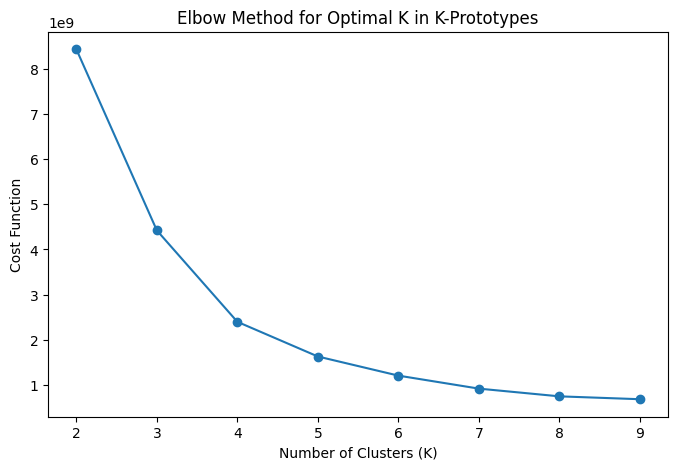

KeyboardInterrupt: Interrupted by user

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import time


print("‚úÖ Step 1: Identifying Numerical & Categorical Features...")
numerical_features = ['age_days_outcome', 'los_at_shelter']
categorical_features = ['animal_type', 'has_name', 'age_group_intake', 'month_of_outcome',
                        'is_fixed', 'breed_type', 'color_group', 'intake_condition_group']

# Convert categorical columns to string type
df_clustering_sample[categorical_features] = df_clustering_sample[categorical_features].astype(str)

# Convert DataFrame to numpy array for K-Prototypes
X = df_clustering_sample[numerical_features + categorical_features].to_numpy()

# Get categorical column indexes (after numerical features)
cat_cols_idx = [i for i in range(len(numerical_features), len(numerical_features + categorical_features))]

print("‚úÖ Step 2: Finding Optimal Number of Clusters using Elbow Method...")

# Find optimal k using the Elbow Method
costs = []
K_range = range(2, 10)  # Testing cluster sizes from 2 to 10

for k in K_range:
    print(f"   ‚ñ∂Ô∏è Running K-Prototypes for K={k}...")
    start_time = time.time()
    kproto = KPrototypes(n_clusters=k, random_state=42)
    kproto.fit(X, categorical=cat_cols_idx)
    costs.append(kproto.cost_)
    print(f"   ‚úÖ Done in {round(time.time() - start_time, 2)} sec - Cost: {kproto.cost_}")

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost Function')
plt.title('Elbow Method for Optimal K in K-Prototypes')
plt.show()

In [ ]:
# try 4, 5, 6 clusters
# Choosing best K (Elbow point estimation)
optimal_k = 4

print(f"\n‚úÖ Step 3: Running Final K-Prototypes with K={optimal_k}...")

# Apply K-Prototypes with optimal k
kproto = KPrototypes(n_clusters=optimal_k, random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_cols_idx)

# ‚úÖ Create a new DataFrame for storing cluster labels consistently
df_kprototypes_clusters = df_clustering_sample.copy()
df_kprototypes_clusters[f'kprototypes_cluster_{optimal_k}'] = clusters

print("‚úÖ Clustering Completed! Here‚Äôs the cluster distribution:\n")
print(df_kprototypes_clusters[f'kprototypes_cluster_{optimal_k}'].value_counts())

# ‚úÖ Silhouette Score Calculation
print("\n‚úÖ Step 4: Evaluating Clusters using Silhouette Score...")
try:
    score = silhouette_score(X[:, :len(numerical_features)].astype(float), clusters)
    print(f"Silhouette Score: {score:.3f}")
except:
    print("‚ö†Ô∏è Silhouette Score calculation failed (common for mixed data).")

# ‚úÖ Cluster Interpretation
print("\n‚úÖ Step 5: Cluster Interpretation...")
cluster_summary = df_kprototypes_clusters.groupby(f'kprototypes_cluster_{optimal_k}').agg({
    'age_days_outcome': 'mean',
    'los_at_shelter': 'mean',
    'animal_type': pd.Series.mode,
    'breed_type': pd.Series.mode,
    'color_group': pd.Series.mode,
    'intake_condition_group': pd.Series.mode
}).reset_index()

from IPython.display import display
display(cluster_summary)

print(f"\n‚úÖ Cluster assignments for K={optimal_k} stored in `df_kprototypes_clusters` üöÄ")


‚úÖ Step 3: Running Final K-Prototypes with K=4...
‚úÖ Clustering Completed! Here‚Äôs the cluster distribution:

kprototypes_cluster_4
0    17834
2     8109
1     2715
3     1342
Name: count, dtype: int64

‚úÖ Step 4: Evaluating Clusters using Silhouette Score...
Silhouette Score: 0.676

‚úÖ Step 5: Cluster Interpretation...


kprototypes_cluster_4  age_days_outcome  los_at_shelter animal_type  \
0                      0        180.526466       22.035887         Cat   
1                      1       2292.103131       39.274033         Dog   
2                      2        903.740412       29.304353         Dog   
3                      3       4158.237705       42.509687         Dog   

  breed_type color_group intake_condition_group  
0        Mix       Black         Healthy/Normal  
1        Mix       White         Healthy/Normal  
2        Mix       White         Healthy/Normal  
3        Mix       White         Healthy/Normal


‚úÖ Cluster assignments for K=4 stored in `df_kprototypes_clusters` üöÄ


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

# Set optimal number of clusters
optimal_k = 5

print(f"\n‚úÖ Step 1: Running Final K-Prototypes with K={optimal_k}...")

# Apply K-Prototypes with optimal k
kproto = KPrototypes(n_clusters=optimal_k, random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_cols_idx)

# ‚úÖ Ensure df_kprototypes_clusters exists & copy full dataset
if 'df_kprototypes_clusters' not in globals():
    df_kprototypes_clusters = df_clustering_sample.copy()

# ‚úÖ Add cluster labels for K=5
df_kprototypes_clusters[f'kprototypes_cluster_{optimal_k}'] = clusters

print("‚úÖ Clustering Completed! Here‚Äôs the cluster distribution:\n")
print(df_kprototypes_clusters[f'kprototypes_cluster_{optimal_k}'].value_counts())

# ‚úÖ Silhouette Score Calculation
print("\n‚úÖ Step 2: Evaluating Clusters using Silhouette Score...")
try:
    score = silhouette_score(X[:, :len(numerical_features)].astype(float), clusters)
    print(f"Silhouette Score: {score:.3f}")
except:
    print("‚ö†Ô∏è Silhouette Score calculation failed (common for mixed data).")

# ‚úÖ Cluster Interpretation
print("\n‚úÖ Step 3: Cluster Interpretation...")
cluster_summary = df_kprototypes_clusters.groupby(f'kprototypes_cluster_{optimal_k}').agg({
    'age_days_outcome': 'mean',
    'los_at_shelter': 'mean',
    'animal_type': pd.Series.mode,
    'breed_type': pd.Series.mode,
    'color_group': pd.Series.mode,
    'intake_condition_group': pd.Series.mode
}).reset_index()

from IPython.display import display
display(cluster_summary)

print(f"\n‚úÖ Cluster assignments for K={optimal_k} stored in `df_kprototypes_clusters` üöÄ")


‚úÖ Step 1: Running Final K-Prototypes with K=5...
‚úÖ Clustering Completed! Here‚Äôs the cluster distribution:

kprototypes_cluster_5
0    17692
2     7301
4     2518
1     1433
3     1056
Name: count, dtype: int64

‚úÖ Step 2: Evaluating Clusters using Silhouette Score...
Silhouette Score: 0.677

‚úÖ Step 3: Cluster Interpretation...


kprototypes_cluster_5  age_days_outcome  los_at_shelter animal_type  \
0                      0        177.798044       21.864854         Cat   
1                      1       2871.987439       42.759246         Dog   
2                      2        823.450212       28.359403         Dog   
3                      3       4375.558712       43.760417         Dog   
4                      4       1770.291501       36.903892         Dog   

  breed_type color_group intake_condition_group  
0        Mix       Black         Healthy/Normal  
1        Mix       White         Healthy/Normal  
2        Mix       White         Healthy/Normal  
3        Mix       White         Healthy/Normal  
4        Mix       White         Healthy/Normal


‚úÖ Cluster assignments for K=5 stored in `df_kprototypes_clusters` üöÄ


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import time

# Set optimal number of clusters
optimal_k = 6

print(f"\n‚úÖ Step 1: Running Final K-Prototypes with K={optimal_k}...")

# Apply K-Prototypes with optimal k
kproto = KPrototypes(n_clusters=optimal_k, random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_cols_idx)

# ‚úÖ Ensure df_kprototypes_clusters exists & copy full dataset
if 'df_kprototypes_clusters' not in globals():
    df_kprototypes_clusters = df_clustering_sample.copy()

# ‚úÖ Add cluster labels for K=6
df_kprototypes_clusters[f'kprototypes_cluster_{optimal_k}'] = clusters

print("‚úÖ Clustering Completed! Here‚Äôs the cluster distribution:\n")
print(df_kprototypes_clusters[f'kprototypes_cluster_{optimal_k}'].value_counts())

# ‚úÖ Silhouette Score Calculation
print("\n‚úÖ Step 2: Evaluating Clusters using Silhouette Score...")
try:
    score = silhouette_score(X[:, :len(numerical_features)].astype(float), clusters)
    print(f"Silhouette Score: {score:.3f}")
except:
    print("‚ö†Ô∏è Silhouette Score calculation failed (common for mixed data).")

# ‚úÖ Cluster Interpretation
print("\n‚úÖ Step 3: Cluster Interpretation...")
cluster_summary = df_kprototypes_clusters.groupby(f'kprototypes_cluster_{optimal_k}').agg({
    'age_days_outcome': 'mean',
    'los_at_shelter': 'mean',
    'animal_type': pd.Series.mode,
    'breed_type': pd.Series.mode,
    'color_group': pd.Series.mode,
    'intake_condition_group': pd.Series.mode
}).reset_index()

from IPython.display import display
display(cluster_summary)

print(f"\n‚úÖ Cluster assignments for K={optimal_k} stored in `df_kprototypes_clusters` üöÄ")



‚úÖ Step 1: Running Final K-Prototypes with K=6...
‚úÖ Clustering Completed! Here‚Äôs the cluster distribution:

kprototypes_cluster_6
0    17655
2     7141
5     2124
1     1275
4     1263
3      542
Name: count, dtype: int64

‚úÖ Step 2: Evaluating Clusters using Silhouette Score...
Silhouette Score: 0.673

‚úÖ Step 3: Cluster Interpretation...


kprototypes_cluster_6  age_days_outcome  los_at_shelter animal_type  \
0                      0        177.129142       21.804191         Cat   
1                      1       3384.801569       45.133333         Dog   
2                      2        809.870746       27.043411         Dog   
3                      3       4944.723247       37.972325         Dog   
4                      4       2400.749010       39.944576         Dog   
5                      5       1606.895009       41.265537         Dog   

  breed_type color_group intake_condition_group  
0        Mix       Black         Healthy/Normal  
1        Mix       White         Healthy/Normal  
2        Mix       White         Healthy/Normal  
3        Mix       White         Healthy/Normal  
4        Mix       White         Healthy/Normal  
5        Mix       White         Healthy/Normal


‚úÖ Cluster assignments for K=6 stored in `df_kprototypes_clusters` üöÄ


## DBSCAN (May need Scaling) and encoding

Patterns in Intake Conditions

can help detect anomalies

Categorical needs to be encoded

if features has mixed scales then problem, if features have the same scale range standardization is not necessarry

Can try with or without standardization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import time

print("\n‚úÖ Step 1: Creating a New Dataset for DBSCAN Clustering...")

# Create a separate dataset for DBSCAN clustering
df_clustering_sample_dbscan = df.sample(n=30000, random_state=42).copy()

# Identify columns
numerical_features = ['age_days_outcome', 'los_at_shelter']
categorical_features = ['animal_type', 'has_name', 'age_group_intake', 'month_of_outcome',
                        'is_fixed', 'breed_type', 'color_group', 'intake_condition_group']

print("‚úÖ Step 2: Encoding Categorical Features...")

# One-Hot Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_clustering_sample_dbscan[categorical_features])

print("‚úÖ Step 3: Standardizing Numerical Features...")

# Standardize numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(df_clustering_sample_dbscan[numerical_features])

# Combine encoded categorical and standardized numerical features
X_encoded = np.hstack((scaled_nums, encoded_cats))

# Choose DBSCAN parameters (These need tuning)
eps_value = 0.5  # Adjust based on data
min_samples_value = 5  # Adjust based on data

print(f"\n‚úÖ Step 4: Running DBSCAN with eps={eps_value} and min_samples={min_samples_value}...")

# Apply DBSCAN
start_time = time.time()
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(X_encoded)
print(f"   ‚úÖ DBSCAN Completed in {round(time.time() - start_time, 2)} sec")

# Create a new DataFrame for storing cluster labels
df_dbscan_clusters = df_clustering_sample_dbscan[['age_days_outcome', 'los_at_shelter']].copy()
df_dbscan_clusters['dbscan_cluster'] = clusters

print("\n‚úÖ Step 5: Checking Cluster Distribution...")
print(df_dbscan_clusters['dbscan_cluster'].value_counts())

# Silhouette Score Calculation (Only if more than 1 valid cluster)
unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

if unique_clusters > 1:
    print("\n‚úÖ Step 6: Evaluating Clusters using Silhouette Score...")
    score = silhouette_score(X_encoded, clusters)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("‚ö†Ô∏è Not enough clusters to compute Silhouette Score.")

# Cluster Interpretation
print("\n‚úÖ Step 7: Cluster Interpretation...")
cluster_summary = df_clustering_sample_dbscan.groupby(clusters).agg({
    'age_days_outcome': 'mean',
    'los_at_shelter': 'mean',
    'animal_type': pd.Series.mode,
    'breed_type': pd.Series.mode,
    'color_group': pd.Series.mode,
    'intake_condition_group': pd.Series.mode
}).reset_index()

from IPython.display import display
display(cluster_summary)

print("\n‚úÖ Cluster assignments stored in `df_dbscan_clusters` üöÄ")



‚úÖ Step 1: Creating a New Dataset for DBSCAN Clustering...
‚úÖ Step 2: Encoding Categorical Features...
‚úÖ Step 3: Standardizing Numerical Features...

‚úÖ Step 4: Running DBSCAN with eps=0.5 and min_samples=5...
   ‚úÖ DBSCAN Completed in 0.8 sec

‚úÖ Step 5: Checking Cluster Distribution...
dbscan_cluster
-1       10294
 45        114
 100       101
 7          99
 481        97
         ...  
 1164        5
 1165        5
 1222        5
 1168        5
 1199        4
Name: count, Length: 1230, dtype: int64

‚úÖ Step 6: Evaluating Clusters using Silhouette Score...
Silhouette Score: 0.238

‚úÖ Step 7: Cluster Interpretation...


index  age_days_outcome  los_at_shelter animal_type breed_type  \
0        -1       1203.527686       43.656305         Dog        Mix   
1         0        129.000000       10.411765         Dog        Mix   
2         1        206.611111       14.666667         Cat        Mix   
3         2         43.111111       13.333333         Cat       Pure   
4         3        602.312500        8.562500         Dog        Mix   
...     ...               ...             ...         ...        ...   
1225   1224       1549.500000        8.833333         Cat       Pure   
1226   1225        245.200000       11.200000         Dog       Pure   
1227   1226        353.000000       66.400000         Dog        Mix   
1228   1227       1325.200000       10.400000         Dog        Mix   
1229   1228         68.600000       45.600000         Dog        Mix   

     color_group    intake_condition_group  
0          Black            Healthy/Normal  
1          Black            Healthy/Normal  
2          White            Healthy/Normal  
3          Black            Healthy/Normal  
4          Brown            Healthy/Normal  
...          ...                       ...  
1225       White            Healthy/Normal  
1226       Brown            Healthy/Normal  
1227       Black                   Injured  
1228    Tricolor            Healthy/Normal  
1229       White  Life Stage/Developmental  

[1230 rows x 7 columns]


‚úÖ Cluster assignments stored in `df_dbscan_clusters` üöÄ


### Checking for best eps and min samples


‚úÖ Step 1: Estimating Best `eps` Using K-Distance Plot...


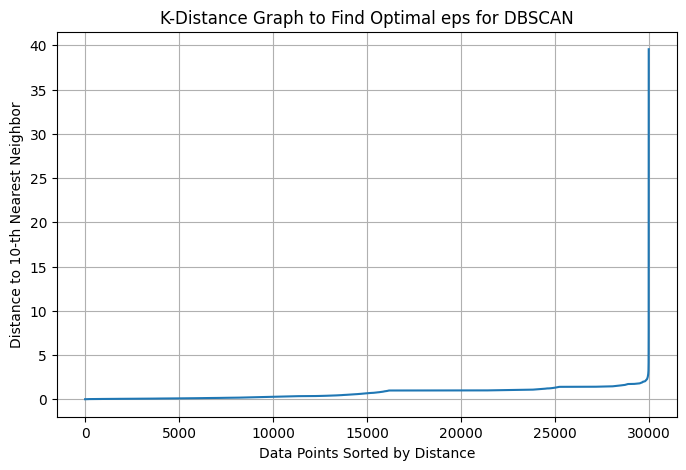

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

print("\n‚úÖ Step 1: Estimating Best `eps` Using K-Distance Plot...")

# Compute the k-distance for nearest neighbors (default k = min_samples = 5)
min_samples_value = 10  # You can adjust this
neighbors = NearestNeighbors(n_neighbors=min_samples_value)
neighbors_fit = neighbors.fit(X_encoded)
distances, indices = neighbors_fit.kneighbors(X_encoded)

# Sort and plot k-distance
sorted_distances = np.sort(distances[:, -1])  # Get the max distance for each point
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel(f"Distance to {min_samples_value}-th Nearest Neighbor")
plt.title("K-Distance Graph to Find Optimal eps for DBSCAN")
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
eps_value = 2.5
print("\n‚úÖ Step 2: Testing Different DBSCAN Parameters...")

# Define a range of values for eps and min_samples
eps_range = [eps_value * 0.8, eps_value, eps_value * 1.2]  # Try slight variations
min_samples_range = [8, 10, 15]

best_score = -1
best_eps = None
best_min_samples = None

# Iterate over different values of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        print(f"   ‚ñ∂Ô∏è Running DBSCAN with eps={eps:.3f}, min_samples={min_samples}...")

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_encoded)

        # Ignore cases where most points are noise (-1 cluster)
        unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if unique_clusters < 2:
            print("      ‚ö†Ô∏è Too few clusters, skipping...")
            continue

        # Compute Silhouette Score
        score = silhouette_score(X_encoded, clusters)
        print(f"      ‚úÖ Silhouette Score: {score:.3f}")

        # Update best parameters
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

# Final selected parameters
if best_eps:
    print(f"\n‚úÖ Best Parameters Found: eps={best_eps:.3f}, min_samples={best_min_samples}")
else:
    print("‚ö†Ô∏è No suitable parameters found. Try adjusting the eps range manually.")



‚úÖ Step 2: Testing Different DBSCAN Parameters...
   ‚ñ∂Ô∏è Running DBSCAN with eps=2.000, min_samples=8...
      ‚úÖ Silhouette Score: 0.672
   ‚ñ∂Ô∏è Running DBSCAN with eps=2.000, min_samples=10...
      ‚ö†Ô∏è Too few clusters, skipping...
   ‚ñ∂Ô∏è Running DBSCAN with eps=2.000, min_samples=15...
      ‚úÖ Silhouette Score: 0.663
   ‚ñ∂Ô∏è Running DBSCAN with eps=2.500, min_samples=8...
      ‚ö†Ô∏è Too few clusters, skipping...
   ‚ñ∂Ô∏è Running DBSCAN with eps=2.500, min_samples=10...
      ‚ö†Ô∏è Too few clusters, skipping...
   ‚ñ∂Ô∏è Running DBSCAN with eps=2.500, min_samples=15...
      ‚ö†Ô∏è Too few clusters, skipping...
   ‚ñ∂Ô∏è Running DBSCAN with eps=3.000, min_samples=8...
      ‚ö†Ô∏è Too few clusters, skipping...
   ‚ñ∂Ô∏è Running DBSCAN with eps=3.000, min_samples=10...
      ‚ö†Ô∏è Too few clusters, skipping...
   ‚ñ∂Ô∏è Running DBSCAN with eps=3.000, min_samples=15...
      ‚ö†Ô∏è Too few clusters, skipping...

‚úÖ Best Parameters Found: eps=2.000, min_samples=

In [ ]:
# Apply DBSCAN with optimal values
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_encoded)

# ‚úÖ Copy all features instead of only two columns
df_dbscan_clusters = df_clustering_sample_dbscan.copy()

# ‚úÖ Add the cluster labels as a new column
df_dbscan_clusters['dbscan_cluster'] = clusters

print("\n‚úÖ Step 4: Checking Cluster Distribution...")
print(df_dbscan_clusters['dbscan_cluster'].value_counts())

# Compute final silhouette score
if len(set(clusters)) - (1 if -1 in clusters else 0) > 1:
    score = silhouette_score(X_encoded, clusters)
    print(f"\n‚úÖ Final Silhouette Score: {score:.3f}")
else:
    print("‚ö†Ô∏è Not enough clusters for Silhouette Score.")

# Cluster Interpretation
print("\n‚úÖ Step 5: Cluster Interpretation...")
cluster_summary = df_dbscan_clusters.groupby('dbscan_cluster').agg({
    'age_days_outcome': 'mean',
    'los_at_shelter': 'mean',
    'animal_type': pd.Series.mode,
    'breed_type': pd.Series.mode,
    'color_group': pd.Series.mode,
    'intake_condition_group': pd.Series.mode
}).reset_index()

from IPython.display import display
display(cluster_summary)

print("\n‚úÖ Cluster assignments stored in `df_dbscan_clusters` üöÄ")




‚úÖ Step 4: Checking Cluster Distribution...
dbscan_cluster
 0    29901
-1       89
 1       10
Name: count, dtype: int64

‚úÖ Final Silhouette Score: 0.672

‚úÖ Step 5: Cluster Interpretation...


dbscan_cluster  age_days_outcome  los_at_shelter animal_type breed_type  \
0              -1       2668.696629      639.685393         Cat        Mix   
1               0        738.171031       24.480452         Dog        Mix   
2               1       4178.900000      537.200000         Dog        Mix   

      color_group intake_condition_group  
0           Black         Healthy/Normal  
1           White         Healthy/Normal  
2  [Black, White]         Healthy/Normal


‚úÖ Cluster assignments stored in `df_dbscan_clusters` üöÄ


### Outlier Analysis Using Clusters

In [ ]:
# Apply DBSCAN with optimal values
best_eps = 2.0
best_min_samples = 8

print(f"\n‚úÖ Running Final DBSCAN with eps={best_eps}, min_samples={best_min_samples}...")

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_encoded)

# Create a new DataFrame for storing cluster labels
df_dbscan_clusters = df_clustering_sample_dbscan.copy()
df_dbscan_clusters['dbscan_cluster'] = clusters

print("\n‚úÖ Step 4: Checking Cluster Distribution...")
print(df_dbscan_clusters['dbscan_cluster'].value_counts())

# Compute final silhouette score (if valid clusters exist)
unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

if unique_clusters > 1:
    score = silhouette_score(X_encoded, clusters)
    print(f"\n‚úÖ Final Silhouette Score: {score:.3f}")
else:
    print("‚ö†Ô∏è Not enough clusters for Silhouette Score.")



‚úÖ Running Final DBSCAN with eps=2.0, min_samples=8...

‚úÖ Step 4: Checking Cluster Distribution...
dbscan_cluster
 0    29901
-1       89
 1       10
Name: count, dtype: int64

‚úÖ Final Silhouette Score: 0.672


In [ ]:
# Count the number of noise points
noise_points = (df_dbscan_clusters['dbscan_cluster'] == -1).sum()
total_points = len(df_dbscan_clusters)

print(f"\nüîç Noise Analysis:")
print(f"   - Total Data Points: {total_points}")
print(f"   - Noise Points (-1 cluster): {noise_points}")
print(f"   - Percentage of Noise Points: {100 * noise_points / total_points:.2f}%")


üîç Noise Analysis:
   - Total Data Points: 30000
   - Noise Points (-1 cluster): 89
   - Percentage of Noise Points: 0.30%


In [ ]:
print("\n‚úÖ Step 5: Cluster Interpretation...")
cluster_summary = df_dbscan_clusters.groupby('dbscan_cluster').agg({
    'age_days_outcome': 'mean',
    'los_at_shelter': 'mean',
    'animal_type': pd.Series.mode,
    'breed_type': pd.Series.mode,
    'color_group': pd.Series.mode,
    'intake_condition_group': pd.Series.mode
}).reset_index()

from IPython.display import display
display(cluster_summary)

print("\n‚úÖ Cluster assignments stored in `df_dbscan_clusters` üöÄ")


‚úÖ Step 5: Cluster Interpretation...


dbscan_cluster  age_days_outcome  los_at_shelter animal_type breed_type  \
0              -1       2668.696629      639.685393         Cat        Mix   
1               0        738.171031       24.480452         Dog        Mix   
2               1       4178.900000      537.200000         Dog        Mix   

      color_group intake_condition_group  
0           Black         Healthy/Normal  
1           White         Healthy/Normal  
2  [Black, White]         Healthy/Normal


‚úÖ Cluster assignments stored in `df_dbscan_clusters` üöÄ


#### Outlier Visualization


‚úÖ Reducing Dimensionality Using PCA for Visualization...


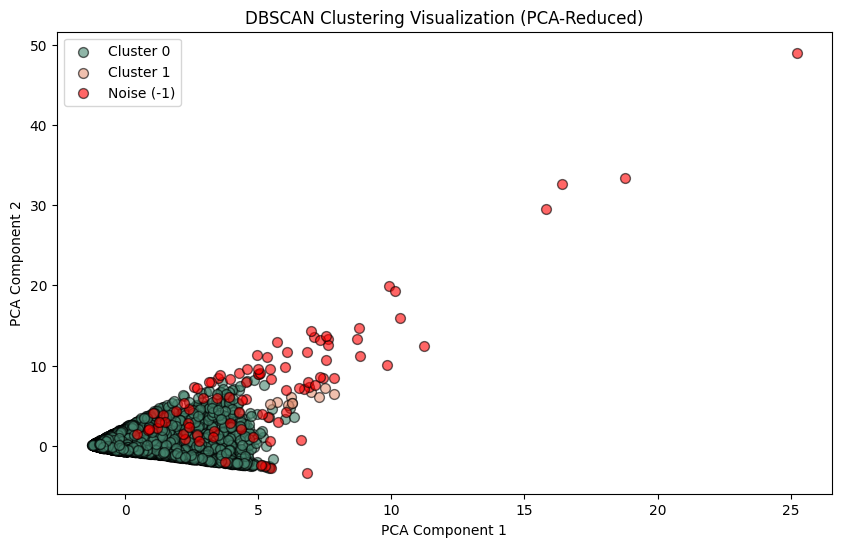

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

print("\n‚úÖ Reducing Dimensionality Using PCA for Visualization...")

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Extract cluster labels
clusters = df_dbscan_clusters['dbscan_cluster']

# Define colors (noise points as red, clusters as different colors)
unique_clusters = set(clusters)
colors = {cluster: np.random.rand(3,) for cluster in unique_clusters}  # Assign a random color to each cluster
colors[-1] = (1, 0, 0)  # Red for noise points

# Scatter plot of PCA-reduced clusters
plt.figure(figsize=(10, 6))
for cluster in unique_clusters:
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1],
                label=f"Cluster {cluster}" if cluster != -1 else "Noise (-1)",
                color=colors[cluster], alpha=0.6, edgecolors='k', s=50)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering Visualization (PCA-Reduced)")
plt.legend()
plt.show()

In [ ]:
noise_count = (df_dbscan_clusters['dbscan_cluster'] == -1).sum()
total_count = len(df_dbscan_clusters)
noise_percentage = 100 * noise_count / total_count

print(f"\nüîç Noise Analysis:")
print(f"   - Total Data Points: {total_count}")
print(f"   - Noise Points (-1 cluster): {noise_count}")
print(f"   - Percentage of Noise Points: {noise_percentage:.2f}%")


üîç Noise Analysis:
   - Total Data Points: 30000
   - Noise Points (-1 cluster): 89
   - Percentage of Noise Points: 0.30%


Since the outlier percentage is low we can assume that DBSCAN is clustering well

## Comparing Clusters

In [ ]:
print("\n‚úÖ Preparing Clustering Comparisons...")

# Define clustering results to compare
clustering_methods = {
    "DBSCAN": df_dbscan_clusters["dbscan_cluster"]
}

# ‚úÖ Dynamically add available K-Prototypes clusters
for k in [4, 5, 6]:
    column_name = f'kprototypes_cluster_{k}'
    if column_name in df_kprototypes_clusters.columns:
        clustering_methods[f"K-Prototypes K={k}"] = df_kprototypes_clusters[column_name]
    else:
        print(f"‚ö†Ô∏è Skipping missing column: {column_name}")

print("\n‚úÖ Final Clustering Methods Available for Comparison:")
for method in clustering_methods.keys():
    print(f"   - {method}")


‚úÖ Preparing Clustering Comparisons...

‚úÖ Final Clustering Methods Available for Comparison:
   - DBSCAN
   - K-Prototypes K=4
   - K-Prototypes K=5
   - K-Prototypes K=6


### PCA Scatter Plots

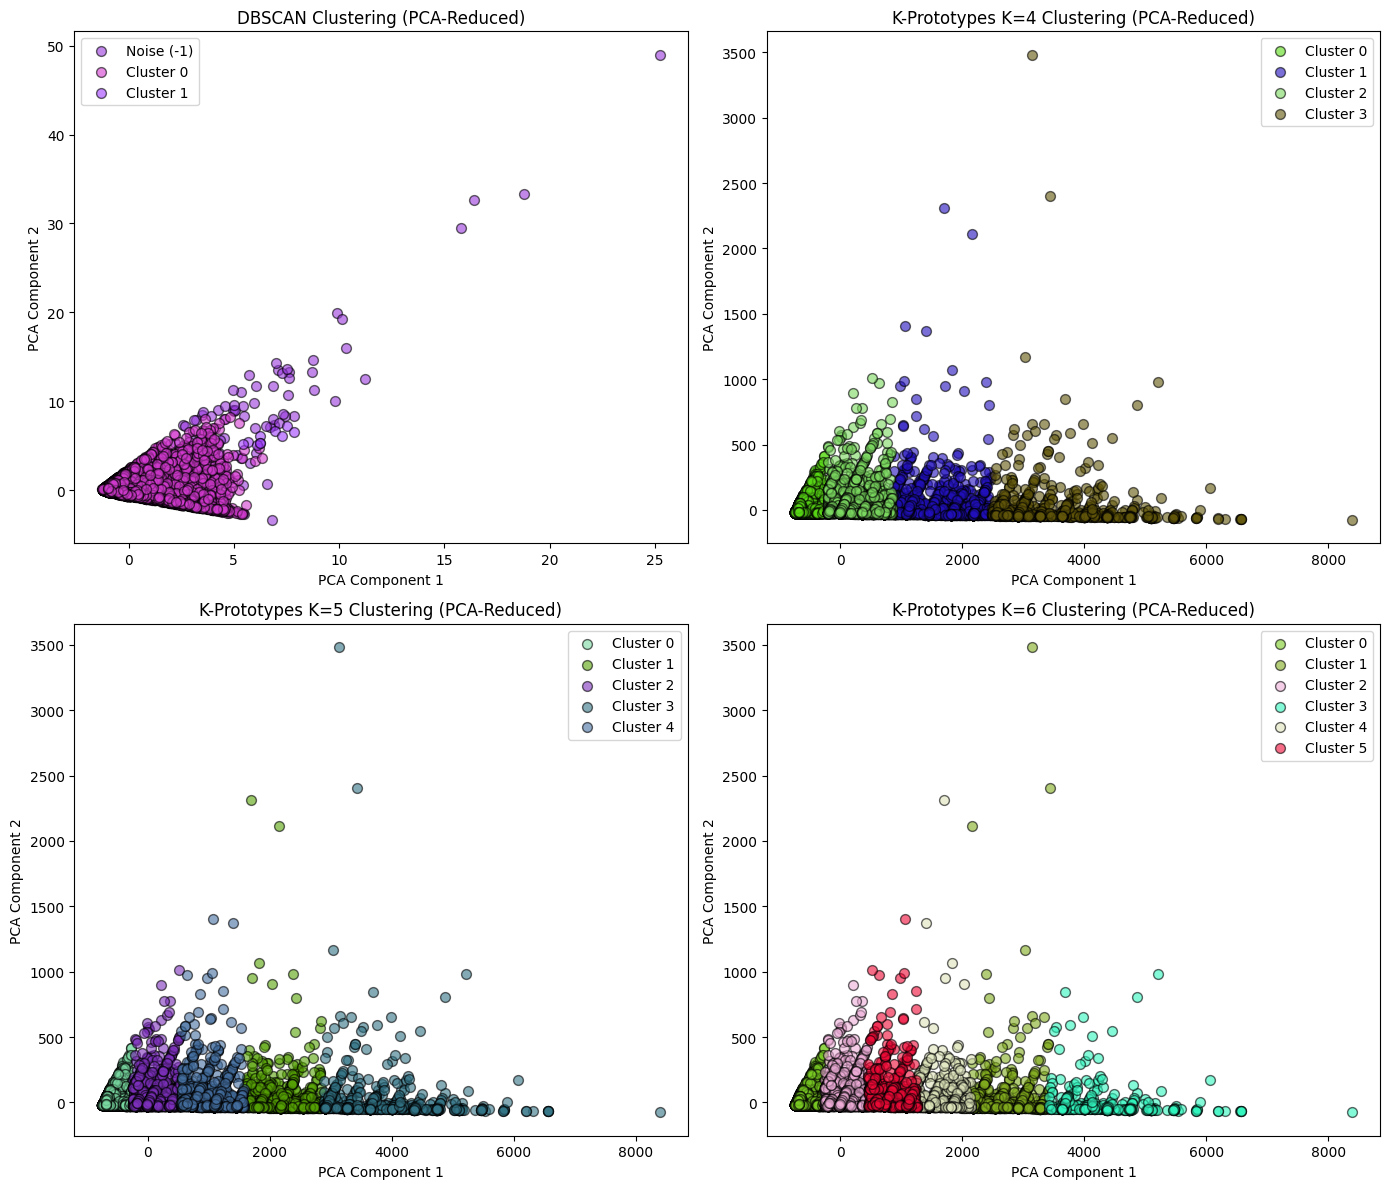

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# ‚úÖ Apply PCA for visualization
pca = PCA(n_components=2)

# ‚úÖ PCA for DBSCAN (uses scaled numerical features)
X_pca_dbscan = pca.fit_transform(X_encoded)

# ‚úÖ PCA for K-Prototypes (uses raw numerical features)
X_pca_kproto = pca.fit_transform(df_kprototypes_clusters[numerical_features].to_numpy())

# ‚úÖ Create subplots for each clustering method
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows, 2 columns
axes = axes.flatten()

for i, (method, clusters) in enumerate(clustering_methods.items()):
    unique_clusters = np.unique(clusters)
    colors = {cluster: np.random.rand(3,) for cluster in unique_clusters}  # Assign colors

    # ‚úÖ Use PCA-reduced dataset (DBSCAN uses scaled; K-Prototypes uses raw numerical)
    X_pca = X_pca_dbscan if "DBSCAN" in method else X_pca_kproto

    for cluster in unique_clusters:
        mask = clusters == cluster
        axes[i].scatter(X_pca[mask, 0], X_pca[mask, 1],
                        label=f"Cluster {cluster}" if cluster != -1 else "Noise (-1)",
                        color=colors[cluster], alpha=0.6, edgecolors='k', s=50)

    axes[i].set_title(f"{method} Clustering (PCA-Reduced)")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")
    axes[i].legend()

plt.tight_layout()
plt.show()


### Cluster Statistics

In [ ]:
print("\n‚úÖ Comparing Clustering Statistics...")

# Create a summary table for each method
cluster_summaries = {}

for method, clusters in clustering_methods.items():
    summary = df_kprototypes_clusters.groupby(clusters).agg({
        'age_days_outcome': 'mean',
        'los_at_shelter': 'mean',
        'animal_type': pd.Series.mode,
        'breed_type': pd.Series.mode,
        'color_group': pd.Series.mode,
        'intake_condition_group': pd.Series.mode
    }).reset_index()
    cluster_summaries[method] = summary

from IPython.display import display
for method, summary in cluster_summaries.items():
    print(f"\nüîπ {method} Cluster Summary:")
    display(summary)



‚úÖ Comparing Clustering Statistics...

üîπ DBSCAN Cluster Summary:


dbscan_cluster  age_days_outcome  los_at_shelter animal_type breed_type  \
0              -1       2668.696629      639.685393         Cat        Mix   
1               0        738.171031       24.480452         Dog        Mix   
2               1       4178.900000      537.200000         Dog        Mix   

      color_group intake_condition_group  
0           Black         Healthy/Normal  
1           White         Healthy/Normal  
2  [Black, White]         Healthy/Normal


üîπ K-Prototypes K=4 Cluster Summary:


kprototypes_cluster_4  age_days_outcome  los_at_shelter animal_type  \
0                      0        180.526466       22.035887         Cat   
1                      1       2292.103131       39.274033         Dog   
2                      2        903.740412       29.304353         Dog   
3                      3       4158.237705       42.509687         Dog   

  breed_type color_group intake_condition_group  
0        Mix       Black         Healthy/Normal  
1        Mix       White         Healthy/Normal  
2        Mix       White         Healthy/Normal  
3        Mix       White         Healthy/Normal


üîπ K-Prototypes K=5 Cluster Summary:


kprototypes_cluster_5  age_days_outcome  los_at_shelter animal_type  \
0                      0        177.798044       21.864854         Cat   
1                      1       2871.987439       42.759246         Dog   
2                      2        823.450212       28.359403         Dog   
3                      3       4375.558712       43.760417         Dog   
4                      4       1770.291501       36.903892         Dog   

  breed_type color_group intake_condition_group  
0        Mix       Black         Healthy/Normal  
1        Mix       White         Healthy/Normal  
2        Mix       White         Healthy/Normal  
3        Mix       White         Healthy/Normal  
4        Mix       White         Healthy/Normal


üîπ K-Prototypes K=6 Cluster Summary:


kprototypes_cluster_6  age_days_outcome  los_at_shelter animal_type  \
0                      0        177.129142       21.804191         Cat   
1                      1       3384.801569       45.133333         Dog   
2                      2        809.870746       27.043411         Dog   
3                      3       4944.723247       37.972325         Dog   
4                      4       2400.749010       39.944576         Dog   
5                      5       1606.895009       41.265537         Dog   

  breed_type color_group intake_condition_group  
0        Mix       Black         Healthy/Normal  
1        Mix       White         Healthy/Normal  
2        Mix       White         Healthy/Normal  
3        Mix       White         Healthy/Normal  
4        Mix       White         Healthy/Normal  
5        Mix       White         Healthy/Normal

### Silhouette Comparison

In [ ]:
from sklearn.metrics import silhouette_score

print("\n‚úÖ Evaluating Clustering Quality with Silhouette Scores...")

silhouette_scores = {}

for method, clusters in clustering_methods.items():
    # ‚úÖ Use **scaled numerical features** only for DBSCAN, unscaled for K-Prototypes
    X_silhouette = X_encoded if "DBSCAN" in method else df_kprototypes_clusters[numerical_features].to_numpy()

    # Compute silhouette score only if there are at least 2 clusters
    unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

    if unique_clusters > 1:
        score = silhouette_score(X_silhouette, clusters)
        silhouette_scores[method] = score
        print(f"   üîπ {method} Silhouette Score: {score:.3f}")
    else:
        print(f"   ‚ö†Ô∏è {method} has too few clusters for silhouette evaluation.")

# Identify the best clustering method
best_method = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n‚úÖ Best Clustering Method Based on Silhouette Score: {best_method}")



‚úÖ Evaluating Clustering Quality with Silhouette Scores...
   üîπ DBSCAN Silhouette Score: 0.672
   üîπ K-Prototypes K=4 Silhouette Score: 0.676
   üîπ K-Prototypes K=5 Silhouette Score: 0.677
   üîπ K-Prototypes K=6 Silhouette Score: 0.673

‚úÖ Best Clustering Method Based on Silhouette Score: K-Prototypes K=5


#### Save Files

In [ ]:
# ‚úÖ Save K-Prototypes clusters
df_kprototypes_clusters.to_csv("kprototypes_clusters.csv", index=False)
print("‚úÖ K-Prototypes cluster labels saved to 'kprototypes_clusters.csv'.")

# ‚úÖ Save DBSCAN clusters
df_dbscan_clusters.to_csv("dbscan_clusters.csv", index=False)
print("‚úÖ DBSCAN cluster labels saved to 'dbscan_clusters.csv'.")

‚úÖ K-Prototypes cluster labels saved to 'kprototypes_clusters.csv'.
‚úÖ DBSCAN cluster labels saved to 'dbscan_clusters.csv'.


## Exploring the best performing cluster

In [ ]:

import pandas as pd

df = pd.read_csv('kprototypes_clusters.csv')


<ipython-input-2-c965845e07d6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="kprototypes_cluster_5", data=df, palette="Set2")


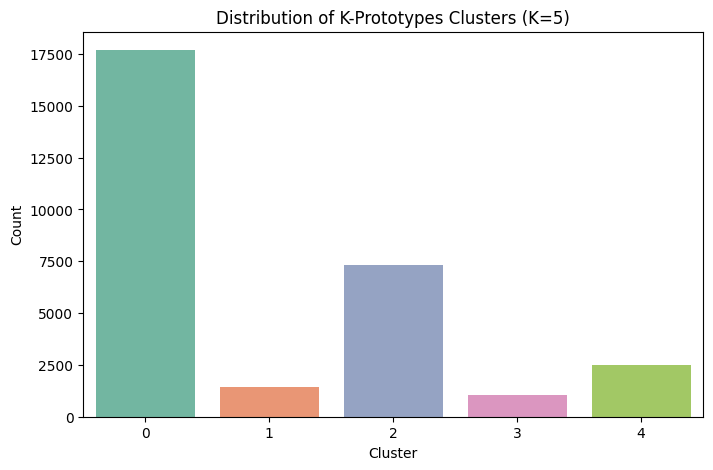

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="kprototypes_cluster_5", data=df, palette="Set2")

# Customize the plot
plt.title("Distribution of K-Prototypes Clusters (K=5)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

<ipython-input-4-9bbc4ccd83d6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="kprototypes_cluster_5", y="age_days_outcome", data=df, palette="Set2")


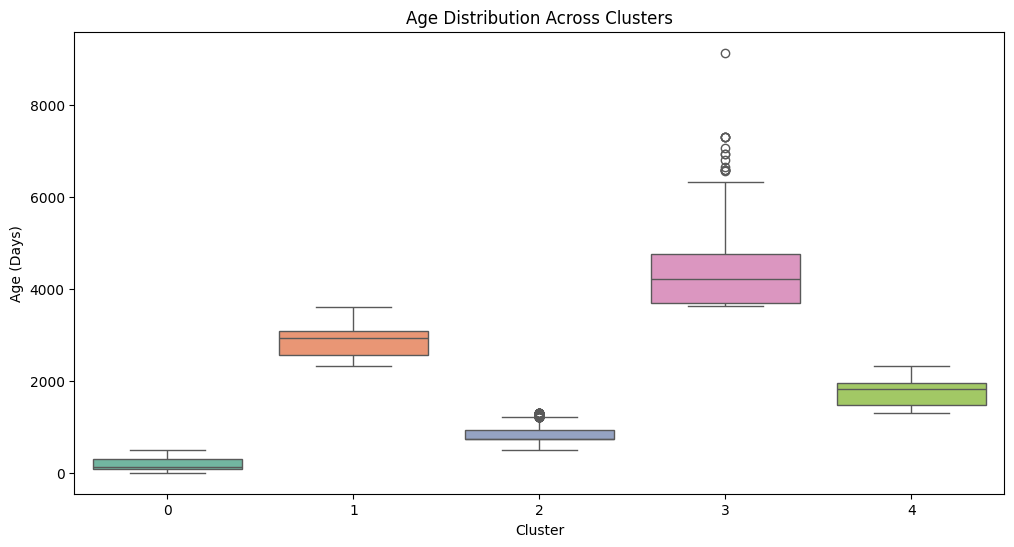

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="kprototypes_cluster_5", y="age_days_outcome", data=df, palette="Set2")
plt.title("Age Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Age (Days)")
plt.show()


<ipython-input-5-8b8f701a445c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="kprototypes_cluster_5", y="los_at_shelter", data=df, palette="Set2")


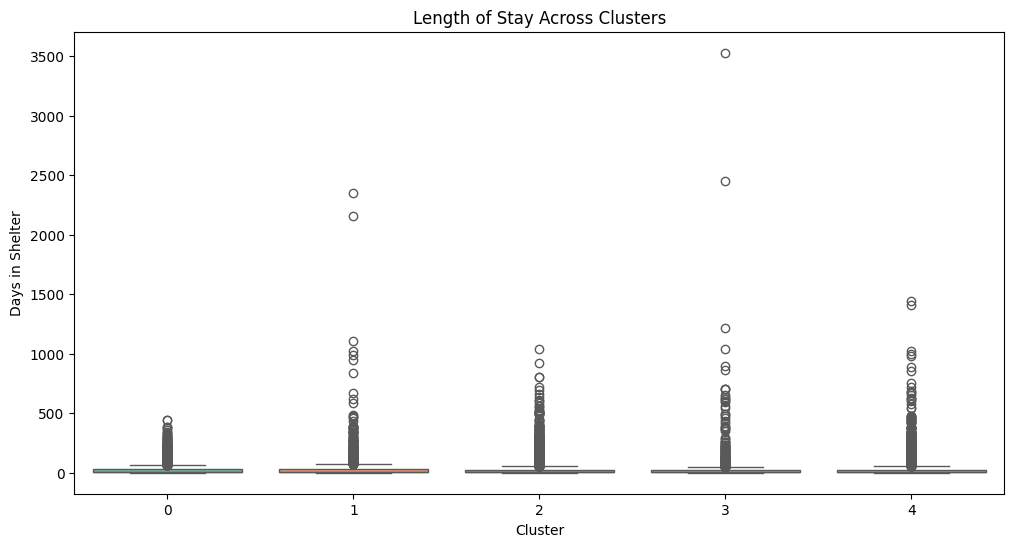

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="kprototypes_cluster_5", y="los_at_shelter", data=df, palette="Set2")
plt.title("Length of Stay Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Days in Shelter")
plt.show()


### Training cluster in full dataset

In [5]:
!pip install kmodes

In [6]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import time

# ‚úÖ Step 1: Identifying Numerical & Categorical Features
print("‚úÖ Step 1: Identifying Numerical & Categorical Features...")
numerical_features = ['age_days_outcome', 'los_at_shelter']
categorical_features = ['animal_type', 'has_name', 'age_group_intake', 'month_of_outcome',
                        'is_fixed', 'breed_type', 'color_group', 'intake_condition_group']

# ‚úÖ Convert categorical columns to string type
df_clustering[categorical_features] = df_clustering[categorical_features].astype(str)

# ‚úÖ Convert DataFrame to numpy array for K-Prototypes
X = df_clustering[numerical_features + categorical_features].to_numpy()

# ‚úÖ Get categorical column indexes (after numerical features)
cat_cols_idx = [i for i in range(len(numerical_features), len(numerical_features + categorical_features))]

# ‚úÖ Set optimal number of clusters
optimal_k = 5

print(f"\n‚úÖ Step 2: Running K-Prototypes with K={optimal_k}...")
start_time = time.time()

# ‚úÖ Apply K-Prototypes
kproto = KPrototypes(n_clusters=optimal_k, random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_cols_idx)

print(f"‚úÖ Clustering Completed in {round(time.time() - start_time, 2)} sec!")

# ‚úÖ Create a new DataFrame for cluster labels (without modifying original df)
df_kprototypes_clusters_5_full = df_clustering.copy()
df_kprototypes_clusters_5_full['kprototypes_cluster_5'] = clusters

# ‚úÖ Display cluster distribution
print("\n‚úÖ Step 3: Cluster Distribution:")
print(df_kprototypes_clusters_5_full['kprototypes_cluster_5'].value_counts())

# ‚úÖ Step 4: Evaluating Clusters using Silhouette Score
try:
    score = silhouette_score(X[:, :len(numerical_features)].astype(float), clusters)
    print(f"\n‚úÖ Silhouette Score: {score:.3f}")
except:
    print("‚ö†Ô∏è Silhouette Score calculation failed (common for mixed data).")

# ‚úÖ Step 5: Cluster Interpretation (Summary Statistics)
print("\n‚úÖ Step 5: Cluster Interpretation...")
cluster_summary = df_kprototypes_clusters_5_full.groupby('kprototypes_cluster_5').agg({
    'age_days_outcome': 'mean',
    'los_at_shelter': 'mean',
    'animal_type': pd.Series.mode,
    'breed_type': pd.Series.mode,
    'color_group': pd.Series.mode,
    'intake_condition_group': pd.Series.mode
}).reset_index()

from IPython.display import display
display(cluster_summary)

print("\n‚úÖ Analysis Completed! üöÄ")

# ‚úÖ Save the new dataframe to a CSV file
df_kprototypes_clusters_5_full.to_csv("kprototypes_clusters_5_full.csv", index=False)
print("‚úÖ Cluster assignments saved as 'kprototypes_clusters_5_full.csv'")


‚úÖ Step 1: Identifying Numerical & Categorical Features...

‚úÖ Step 2: Running K-Prototypes with K=5...
‚úÖ Clustering Completed in 1562.18 sec!

‚úÖ Step 3: Cluster Distribution:
kprototypes_cluster_5
0    70107
2    28588
4     9918
1     5686
3     4263
Name: count, dtype: int64

‚úÖ Silhouette Score: 0.677

‚úÖ Step 5: Cluster Interpretation...


kprototypes_cluster_5  age_days_outcome  los_at_shelter animal_type  \
0                      0        177.273026       21.415579         Cat   
1                      1       2880.618361       44.794935         Dog   
2                      2        823.343781       28.661256         Dog   
3                      3       4386.131128       42.838142         Dog   
4                      4       1767.552127       38.122807         Dog   

  breed_type color_group intake_condition_group  
0        Mix       Black         Healthy/Normal  
1        Mix       White         Healthy/Normal  
2        Mix       White         Healthy/Normal  
3        Mix       White         Healthy/Normal  
4        Mix       White         Healthy/Normal


‚úÖ Analysis Completed! üöÄ
‚úÖ Cluster assignments saved as 'kprototypes_clusters_5_full.csv'
